**Group 8 - Midterm Assignment - Massive Mining Dataset**

---

> ***Group Members***
*   Trần Quốc Bảo - 521H0494
*   Bùi Hải Dương - 521H0220
*   Lê Nguyễn Viết Hiệp - 521H0398
*   Bùi Anh Phú - 521H0508
*   Nguyễn Hoàng Phúc - 521H0511

[Github Repository](https://github.com/scuph-ng/mmds-midterm-2324)

Create folders

In [62]:
!mkdir input output
!mkdir output/f1 output/f2 output/f3 output/f4

mkdir: cannot create directory ‘input’: File exists
mkdir: cannot create directory ‘output’: File exists
mkdir: cannot create directory ‘output/f1’: File exists


Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Read baskets.csv from Google Drive
- The path should be correct with your Google Drive `MyDrive/MMDS/baskets.csv` or you can change the path

In [140]:
# !cp /content/drive/MyDrive/MMDS/baskets.csv /content/input

In [ ]:
!ls /content/input

baskets.csv


## Installation

In [17]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!cp /content/drive/MyDrive/MMDS/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [18]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

! echo $JAVA_HOME
! echo $SPARK_HOME

/usr/lib/jvm/java-8-openjdk-amd64
/content/spark-3.1.1-bin-hadoop3.2


## Initializing Spark

In [20]:
import findspark
findspark.init()

In [21]:
import pyspark as spark

print(spark.__version__)

3.1.1


In [91]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

sc = SparkContext("local", "RDD")

## f1 tasks

In [113]:
# Read baskets.csv
csv_file_path = '/content/input/baskets.csv'

rdd = sc.textFile(csv_file_path)

Get header

In [114]:
header = rdd.first()

In [115]:
# Remove the header
rdd = rdd.filter(lambda line: line != header)

# Extract the product column
products = rdd.map(lambda line: line.split(',')[2])

# Get distinct products
distinct_products = products.distinct()

# Sort distinct products in the ascending order of product names
distinct_products = distinct_products.sortBy(lambda x: x, ascending=True)

In [116]:
total_count = rdd.count()

first_10_products = distinct_products.take(10)
last_10_products = distinct_products.take(total_count)[-10:]

In [117]:
def save_data_to_file(filename: str, data: list):
  with open(filename, "w") as file:
    for element in data:
      file.write(str(element) + "\n")

In [118]:
path_f1 = "/content/output/f1/"

output_file_1 = path_f1 + "first_10_products.txt"
output_file_2 = path_f1 + "last_10_products.txt"

save_data_to_file(output_file_1, first_10_products)
save_data_to_file(output_file_2, last_10_products)

In [119]:
!cat /content/output/f1/first_10_products.txt

Instant food products
UHT-milk
abrasive cleaner
artif. sweetener
baby cosmetics
bags
baking powder
bathroom cleaner
beef
berries


In [120]:
!cat /content/output/f1/last_10_products.txt

turkey
vinegar
waffles
whipped/sour cream
whisky
white bread
white wine
whole milk
yogurt
zwieback


## f2 Tasks

In [136]:
# Count the frequency of each product
product_frequency = products.countByValue()

# Sort the products by frequency in descending order
sorted_products_frequency = sorted(product_frequency.items(), key=lambda x: x[1], reverse=True)

# Select top 100 highest frequency
top_100_products = sorted_products_frequency[:100]

In [134]:
save_data_to_file("/content/output/f2/top_100_products.txt", top_100_products)

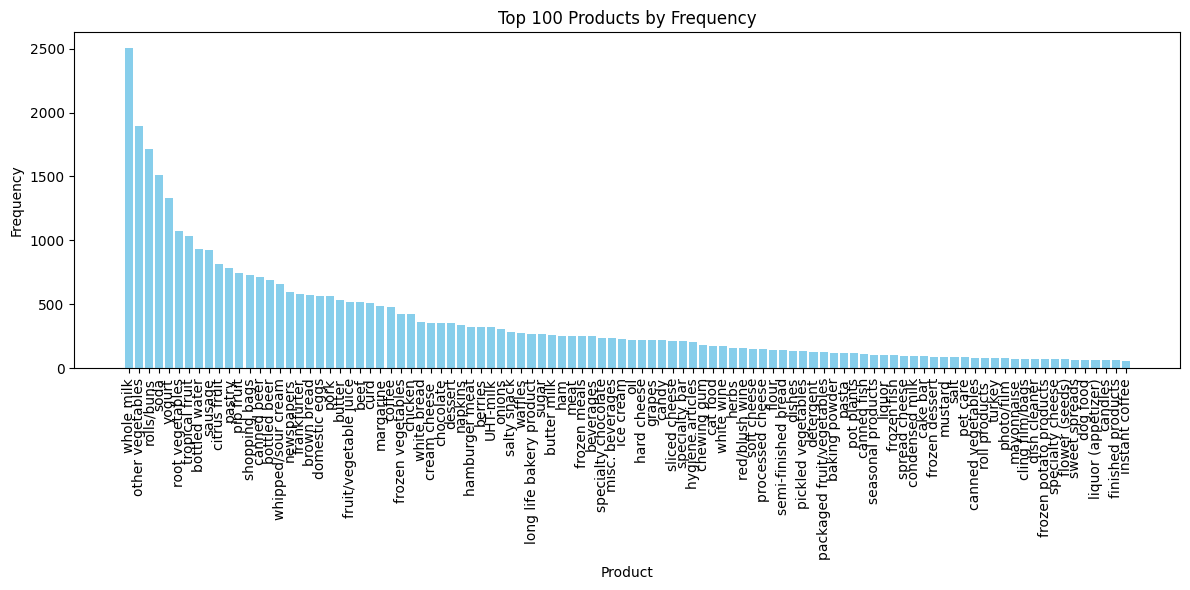

In [139]:
import matplotlib.pyplot as plt

# Extract the product names and frequencies
product_names = [product for product, _ in top_100_products]
frequencies = [count for _, count in top_100_products]

plt.figure(figsize=(12, 6))
plt.bar(product_names, frequencies, color='skyblue')

plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 100 Products by Frequency')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()